In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (12, 5)

In [6]:
def read_file(filename):
    size = []
    blocks = []
    threads = []
    bandwidth = []
    with open(filename) as file:
        for line in file:
            if line[0:19] == 'Copy shared->global':
                bois = re.search(r'.*size=\s*(.+?), gDim=\s*(.+?), bDim=\s*(.+?), bw=\s*(.+?)GB/s', line)
                size.append(bois.group(1))
                blocks.append(bois.group(2))
                threads.append(bois.group(3))
                bandwidth.append(bois.group(4))

    data = np.zeros((len(size), 4))
    data[:, 0] = size
    data[:, 1] = blocks
    data[:, 2] = threads
    data[:, 3] = bandwidth

    df = pd.DataFrame(data)
    df.columns = ['size', 'blocks', 'threads', 'bandwidth']

    #df['blocks'] = df['blocks'].astype(int)
    return df

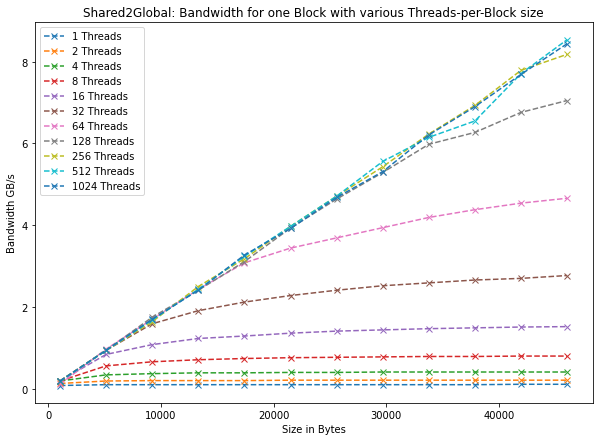

In [7]:
# find best thread number
df = read_file('4_2_s2g.txt')

for thread_per_Block in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    data_for_block = df[df['threads'] == thread_per_Block]
    plt.plot(data_for_block['size'], data_for_block['bandwidth'], marker='x', linestyle='--', label=f'{thread_per_Block} Threads')

plt.xlabel('Size in Bytes')
plt.ylabel('Bandwidth GB/s')
plt.title('Shared2Global: Bandwidth for one Block with various Threads-per-Block size')
plt.legend()
plt.savefig('s2g.png')